<a href="https://colab.research.google.com/github/neethu2602/DSA_Class_Activities-/blob/main/casestudy_breastcancer_NeethuMathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

bc = load_breast_cancer()
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = bc.target



In [6]:
X.shape

(569, 30)

In [7]:
y.shape

(569,)

In [20]:
X.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
acc_before = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_before[name] = accuracy_score(y_test, y_pred)

In [15]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("Explained variance ratio:", explained_var)
print("Total variance retained:", sum(explained_var))

Explained variance ratio: [0.44413492 0.18944618 0.09543356 0.06724689 0.0551769  0.03934534
 0.02181766 0.01583317 0.01278783 0.01145443 0.00926269 0.00847429
 0.00799747 0.00530706]
Total variance retained: 0.9837184043963507


In [16]:
acc_after = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc_after[name] = accuracy_score(y_test, y_pred)

In [17]:
results = pd.DataFrame({
    'Accuracy Before PCA': acc_before,
    'Accuracy After PCA': acc_after
})
results = results.T.round(4)
print("\nModel Comparison:")
print(results)


Model Comparison:
                     Logistic Regression  Random Forest     KNN     SVM  \
Accuracy Before PCA               0.9825         0.9561  0.9561  0.9825   
Accuracy After PCA                0.9649         0.9298  0.9737  0.9737   

                     Decision Tree  Gradient Boosting  
Accuracy Before PCA         0.9123             0.9561  
Accuracy After PCA          0.9123             0.9649  


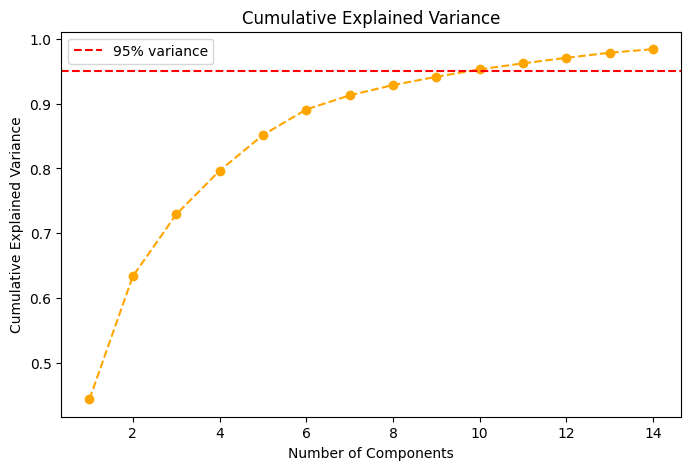

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.show()
